#*Samriddh Singh*
## **GRIP @ TSF TASK - 2**
### Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.



In [101]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import sklearn.metrics as sm

##Getting to know the dataset

In [102]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##Exploring the data

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [105]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head
# Renamed the columns.

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]>

##### Understanding sepal and petal length width relations

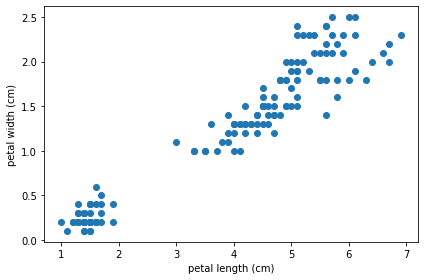

In [106]:
plt.scatter(iris.data[:, 2], iris.data[:, 3])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.tight_layout()
plt.show()

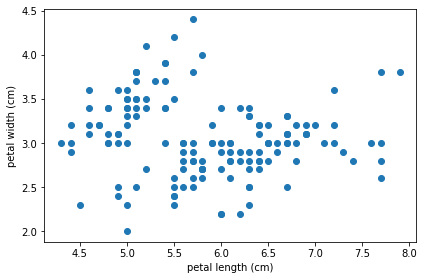

In [107]:
plt.scatter(iris.data[:, 0], iris.data[:, 1])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.tight_layout()
plt.show()

[]

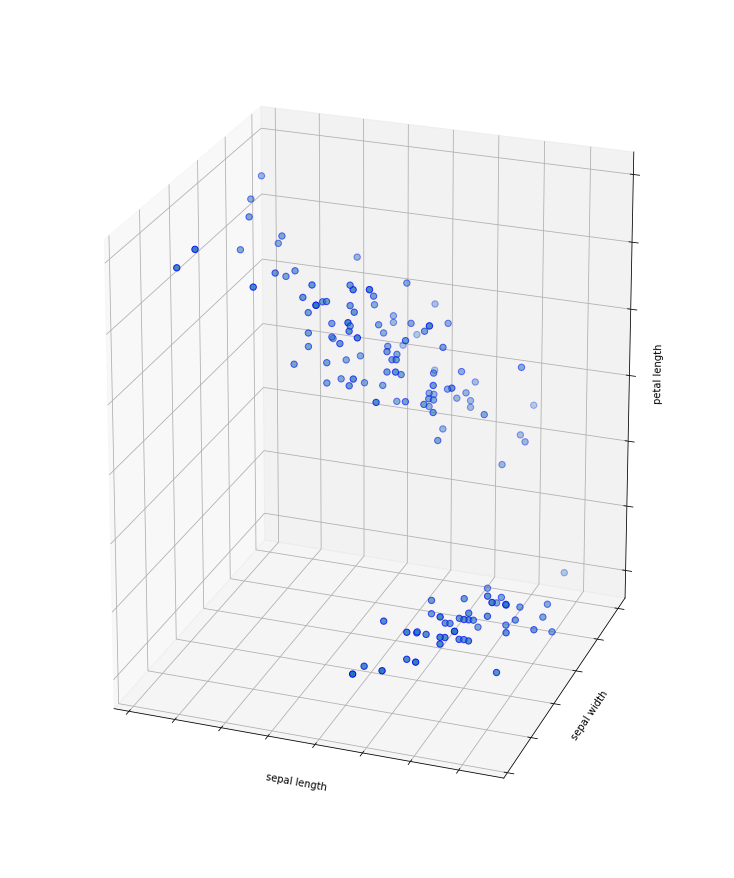

In [108]:
fig = plt.figure(1, figsize=(10, 12))
ax = Axes3D(fig, elev=20, azim=110)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2],
           cmap=plt.cm.Set1, edgecolor='b', s=40)

ax.set_xlabel("sepal length")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("sepal width")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("petal length")
ax.w_zaxis.set_ticklabels([])

[]

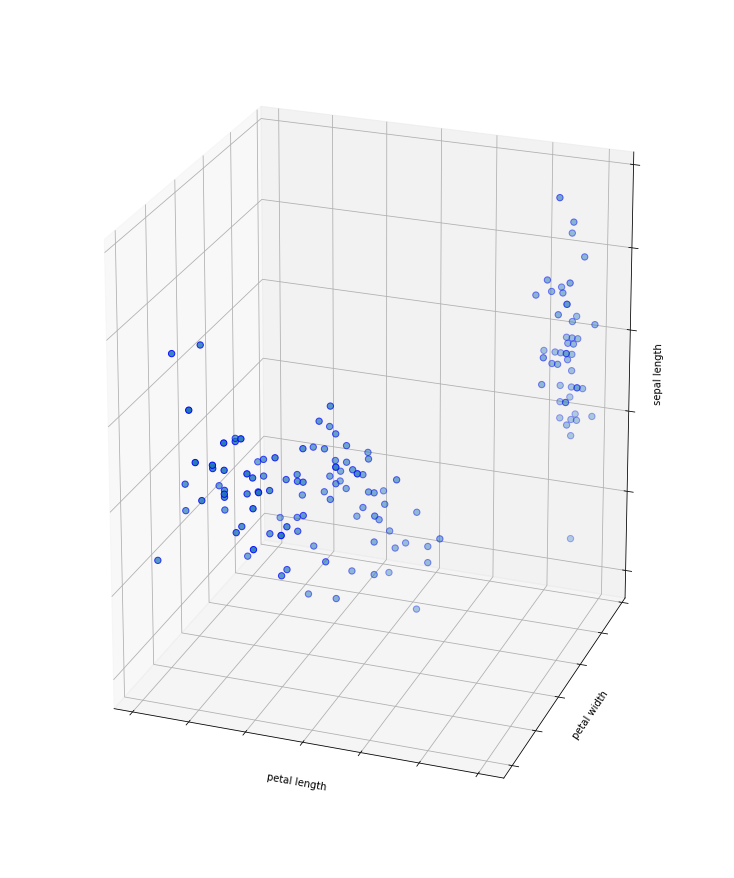

In [109]:
fig = plt.figure(1, figsize=(10, 12))
ax = Axes3D(fig, elev=20, azim=110)
ax.scatter(iris.data[:, 2], iris.data[:, 3], iris.data[:,1],
           cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.set_xlabel("petal length")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("petal width")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("sepal length")
ax.w_zaxis.set_ticklabels([])

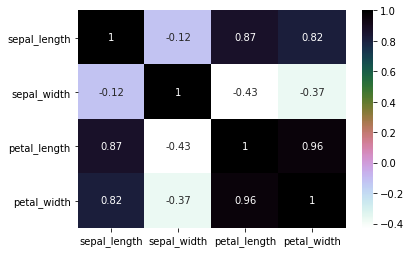

In [110]:
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')

Inferences from above:
1. High positive correlation between sepal length and petal length-width
2. High positive correlation between petal length.

### Estimate values of K for K means clustering

**WCSS Chart/Elbow method**

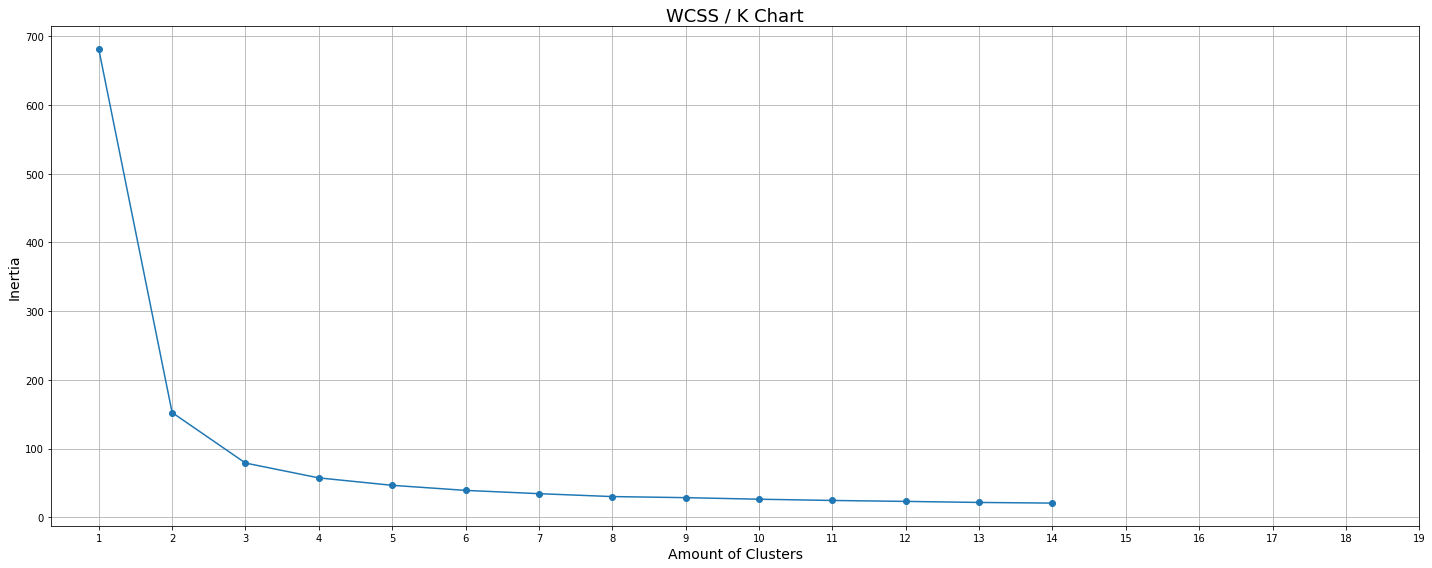

In [19]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()


The WCSS leaves us with 2 choices of clustering ie n=2 or n=3, for confirmation we will perform a silhouette tests to clarify the best value for clusterisation.

**Silhouette Score**

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.49745518901737446
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048


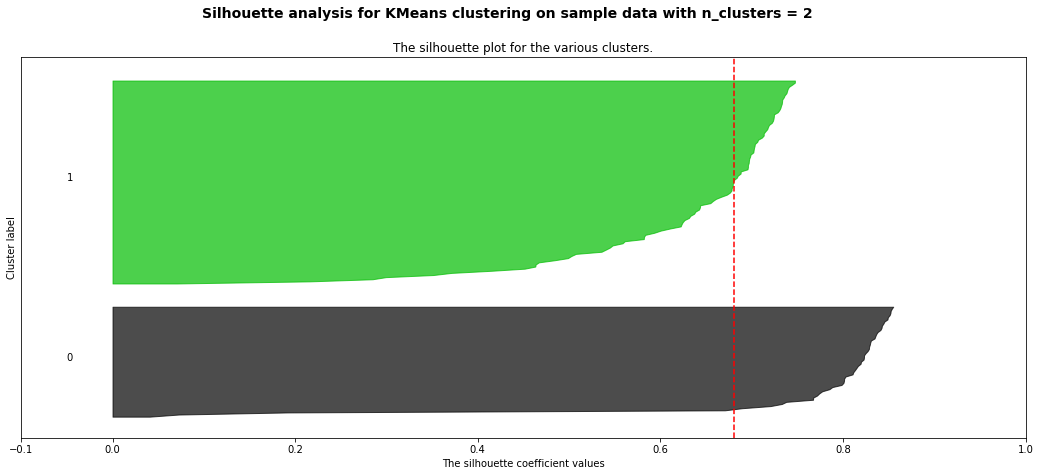

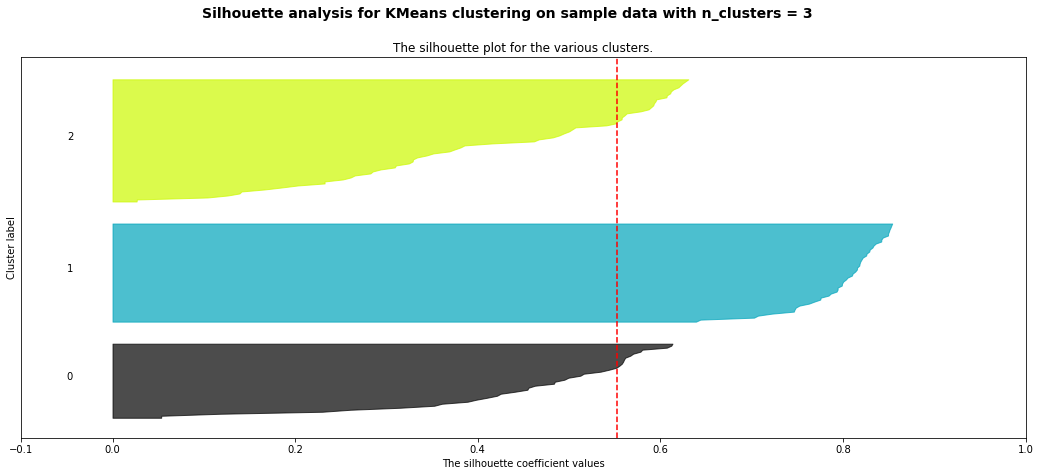

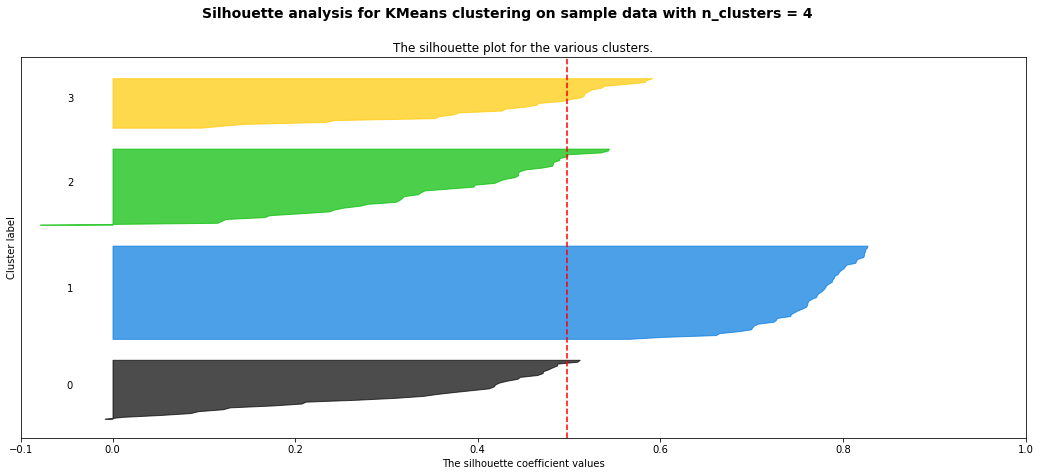

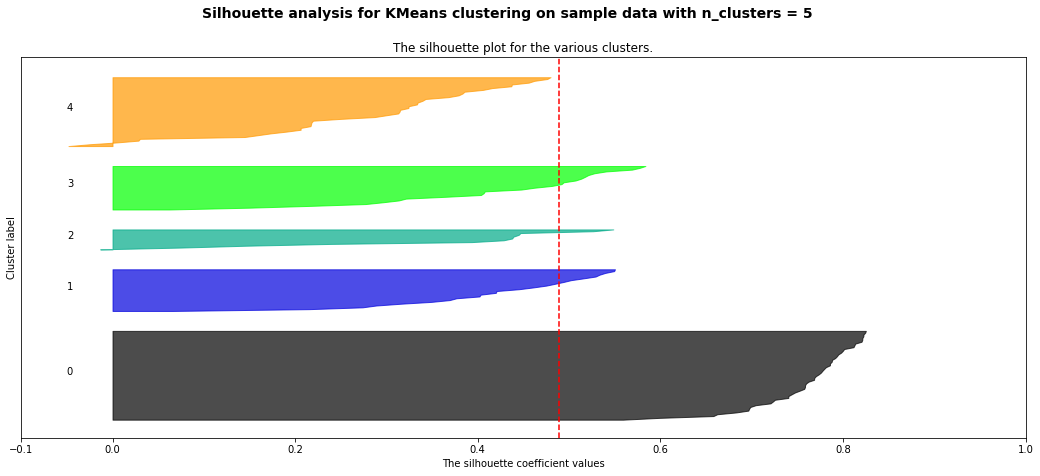

In [56]:
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    

    # Labeling the clusters
    centers = clusterer.cluster_centers_


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

We will now go for n=3. It is a validated choice for clustering algorithm because for higher values there is a negative value of silhouette score which is the first sign of poor clustering.

## Finalising the value of number of cluster centroids as 3 and applying k means clustering we have:

In [131]:
model = KMeans(n_clusters=3, init = 'k-means++', max_iter = 500, random_state = 10)
model.fit(df)

y = pd.DataFrame(iris.target, columns=['Target'])

Text(0.5, 1.0, 'Predicted clusters using unsupervised ML')

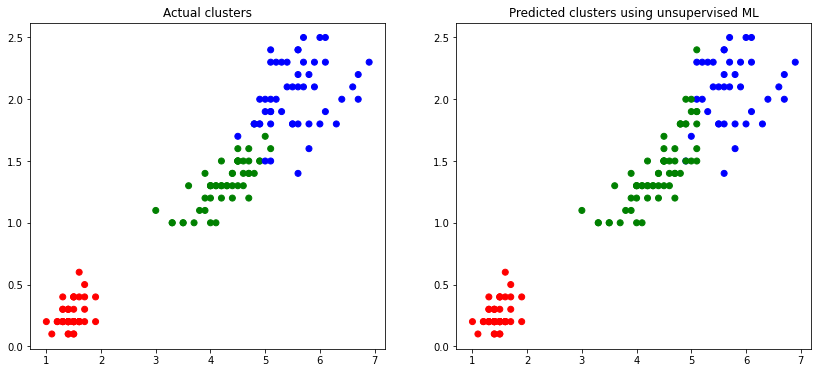

In [132]:
plt.figure(figsize=(14,6))

colors = np.array(['red', 'green', 'blue'])

y_pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(df['petal_length'], df['petal_width'], c=colors[y['Target']])
plt.title('Actual clusters')


plt.subplot(1, 2, 2)
plt.scatter(df['petal_length'], df['petal_width'], c=colors[y_pred])
plt.title("Predicted clusters using unsupervised ML")

In [133]:
sm.accuracy_score(y_pred, y)

0.8933333333333333

In [134]:
sm.confusion_matrix(y_pred,y)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])